Давыдов ПИм-231 лаба 1

Кластерный анализ (иерархический подход): для выполнения задания возьмите ранее используемый датасет об ирисах.

1) Загрузите данные. from sklearn.datasets import load_iris iris = load_iris()

2) Создайте датафрейм iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

3) Отобразите 5 первых строк данных. Если присутствует целевая переменная, то удалите ее.

4) Выведите количество признаков и количество наблюдений.

5) Постройте дендограмму. Сколько кластеров определяется визуально?

6) Выполните стандартизацию данных и заново постройте дендограмму. Изменилось ли что-то?

7) Добавьте столбец с номером кластера, в который попал тот или иной объект.

8) Сравните значения данного столбца с изначальным целевым признаком (номера могут различаться!).

9) Что можно сказать о результатах кластеризации?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import AgglomerativeClustering

1) Загрузите данные. from sklearn.datasets import load_iris iris = load_iris()

2) Создайте датафрейм iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

3) Отобразите 5 первых строк данных. Если присутствует целевая переменная, то удалите ее.

In [ ]:
# Загрузка данных
iris = load_iris()

# Создание датафрейма
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Отображение первых 5 строк данных
print("Первые 5 строк данных:")
print(iris_df.head())

# Удаление целевой переменной, если она присутствует
if 'target' in iris_df.columns:
    iris_df.drop('target', axis=1, inplace=True)

Первые 5 строк данных:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


4) Выведите количество признаков и количество наблюдений.

In [ ]:
# Вывод количества признаков и наблюдений
num_features = iris_df.shape[1]
num_samples = iris_df.shape[0]
print("\nКоличество признаков:", num_features)
print("Количество наблюдений:", num_samples)


Количество признаков: 4
Количество наблюдений: 150


5) Постройте дендограмму. Сколько кластеров определяется визуально?

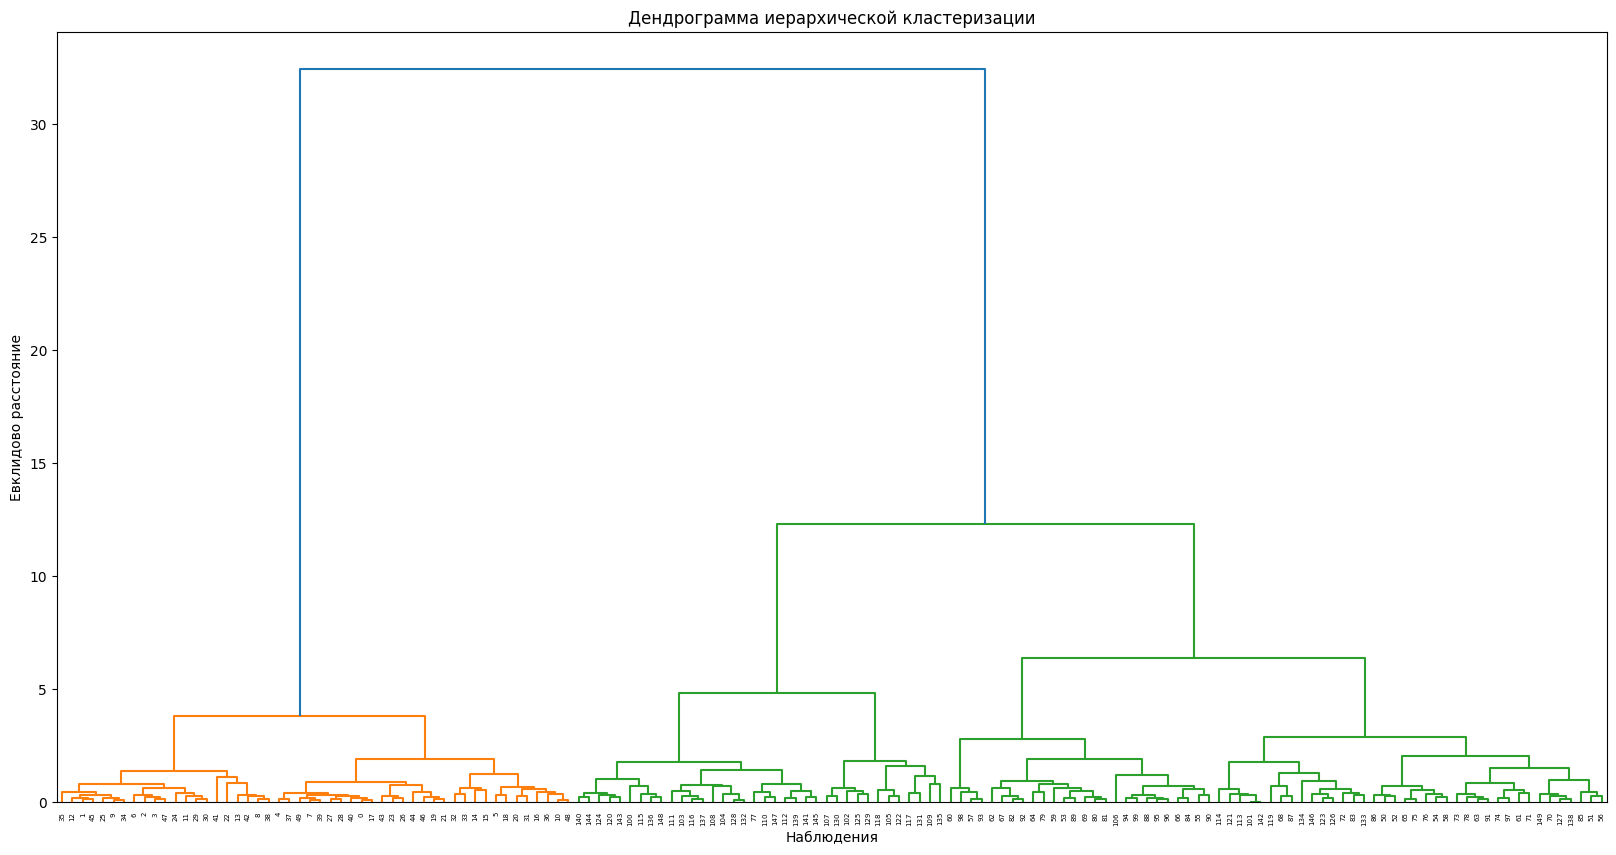

In [ ]:
# Построение дендрограммы
plt.figure(figsize=(20, 10))
plt.title("Дендрограмма иерархической кластеризации")
dendrogram(linkage(iris_df, method='ward'))
plt.xlabel("Наблюдения")
plt.ylabel("Евклидово расстояние")
plt.show()

6) Выполните стандартизацию данных и заново постройте дендограмму. Изменилось ли что-то?

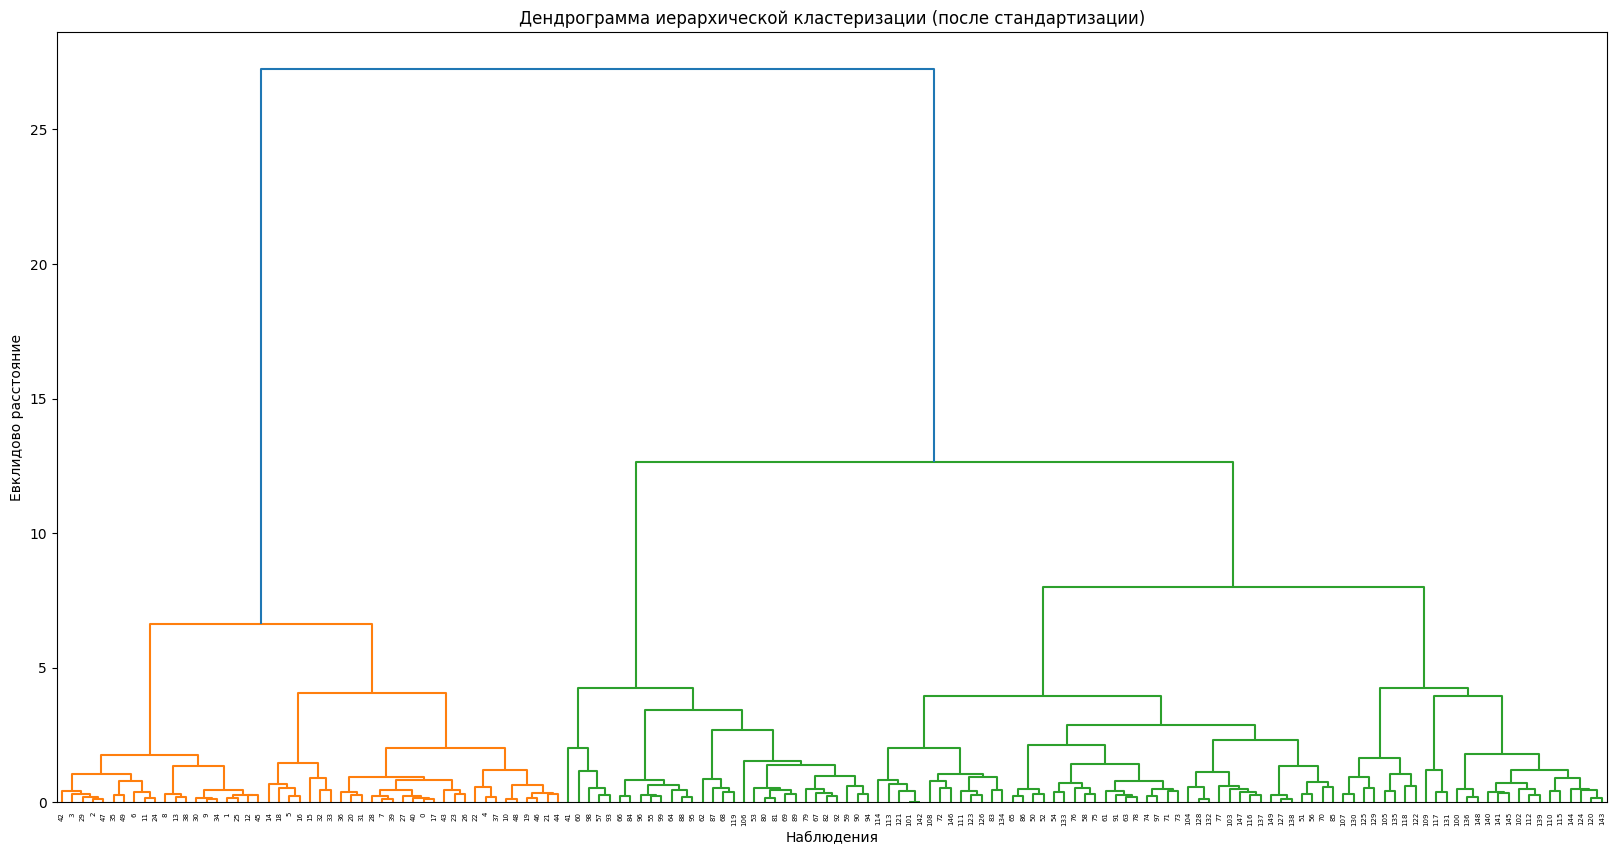

In [ ]:
# Осуществление стандартизации данных
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)

# Построение дендрограммы после стандартизации данных
plt.figure(figsize=(20, 10))
plt.title("Дендрограмма иерархической кластеризации (после стандартизации)")
dendrogram(linkage(iris_scaled, method='ward'))
plt.xlabel("Наблюдения")
plt.ylabel("Евклидово расстояние")
plt.show()

7) Добавьте столбец с номером кластера, в который попал тот или иной объект.

8) Сравните значения данного столбца с изначальным целевым признаком (номера могут различаться!).

In [ ]:
# Кластеризация с помощью иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters = agg_clustering.fit_predict(iris_scaled)

# Добавление столбца с номером кластера
iris_df['Cluster'] = clusters

# Сравнение значений столбца кластеров с целевым признаком
print("\nСравнение значений столбца кластеров с изначальной целевой переменной:")
iris_df['Cluster'].value_counts()


Сравнение значений столбца кластеров с изначальной целевой переменной:


0    71
1    49
2    30
Name: Cluster, dtype: int64

In [ ]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
